In [2]:
import pandas as pd
from flask import Flask, request, jsonify
import numpy as np
import pickle
app=Flask(__name__)
data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv')
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [3]:
#Scale the data(using StandardScaler)
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit(data).transform(data)

In [4]:
#Use PCA with n_components=2 for dimension reduction
from sklearn.decomposition import PCA
pca2=PCA(n_components=2)
reduced_2_PCA=pca2.fit(X).transform(X)

In [5]:
#Fit a GMM to the rediced data
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=3, random_state=10)
model.fit(reduced_2_PCA)

GaussianMixture(n_components=3, random_state=10)

In [6]:
PCA2_pred=model.predict(reduced_2_PCA)

Text(0, 0.5, 'PCA 2')

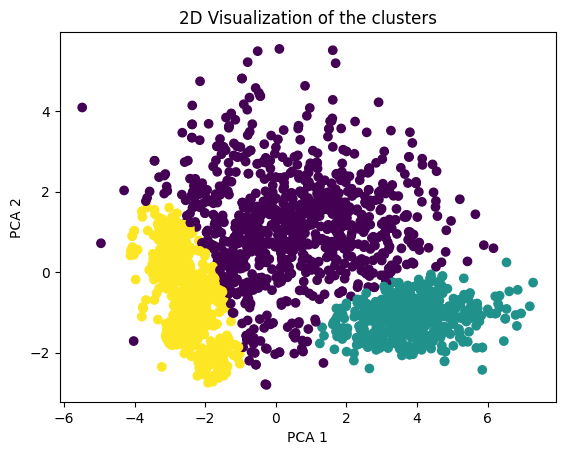

In [7]:
import matplotlib.pyplot as plt
x=reduced_2_PCA[:,0]
y=reduced_2_PCA[:,1]
plt.scatter(x,y,c=PCA2_pred)
plt.title('2D Visualization of the clusters')
plt.xlabel('PCA 1')
plt.ylabel("PCA 2")

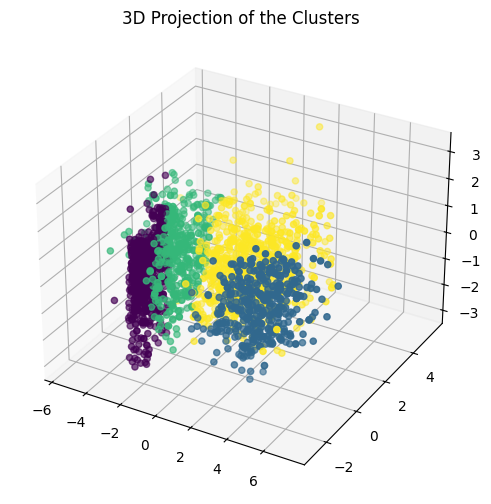

In [8]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
PCA3=PCA(n_components=3)
reduced_3_PCA=PCA3.fit(X).transform(X)
model=GaussianMixture(n_components=4, random_state=0)
PCA3_pred=model.fit(reduced_3_PCA).predict(reduced_3_PCA)

#PLOTTING
reduced_3_PCA=pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(reduced_3_PCA['PCA 1'], reduced_3_PCA['PCA 2'], reduced_3_PCA['PCA 3'], c=PCA3_pred)
ax.set_title("3D Projection of the Clusters")
plt.show()

In [24]:
def predict():
    json_data=request.get_json()
    new_data=np.array(json_data['data']).reshape(1,-1)
    new_data=scaler.transform(new_data)
    reduced_data=PCA3.transform(new_data)
    prediction=model.predict(reduced_data)
    return jsonify({'cluster':int(prediction[0])})

if __name__=='__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\users\akshi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
#Save the scaler and model
with open('SS.pkl','wb') as f:
    pickle.dump(SS,f)
with open('PCA3.pkl', 'wb') as f:
    pickle.dump(pca2, f)
with open('gmm_model.pkl', 'wb') as f:
    pickle.dump(model, f)